## pixel replication

In [15]:
import cv2

# Load the image
image = cv2.imread('einstein.jpg')

# Get the original image size
height, width = image.shape[:2]

# Calculate the new image size after zooming
new_width = int(width * 2)
new_height = int(height * 2)

# Create a new image with the new size using pixel replication
zoomed_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_NEAREST)

# Display the zoomed and original images
cv2.imshow('Zoomed Image', zoomed_image)
cv2.imshow('Original Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## zero-order hold

In [17]:
import cv2

# Load the image
image = cv2.imread('einstein.jpg')

# Get the original image size
height, width = image.shape[:2]

# Calculate the new image size after zooming
new_width = int(width * 2)
new_height = int(height * 2)

# Create a new image with the new size using zero-order hold method
zoomed_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_NEAREST)

# Display the zoomed and original images
cv2.imshow('Zoomed Image', zoomed_image)
cv2.imshow('Original Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## zero-order hold (zoom factor of 4)

In [18]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('einstein.jpg')

# Get the original image size
height, width = image.shape[:2]

# Calculate the new image size after zooming
new_width = width * 4
new_height = height * 4

# Create an empty canvas for the zoomed image
zoomed_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)

# Perform pixel replication zooming
for i in range(new_height):
    for j in range(new_width):
        # Find the corresponding pixel in the original image
        original_i = i // 4
        original_j = j // 4

        # Replicate the pixel value in the zoomed image
        zoomed_image[i, j] = image[original_i, original_j]

# Display the zoomed and original images
cv2.imshow('Zoomed Image', zoomed_image)
cv2.imshow('Original Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## question2

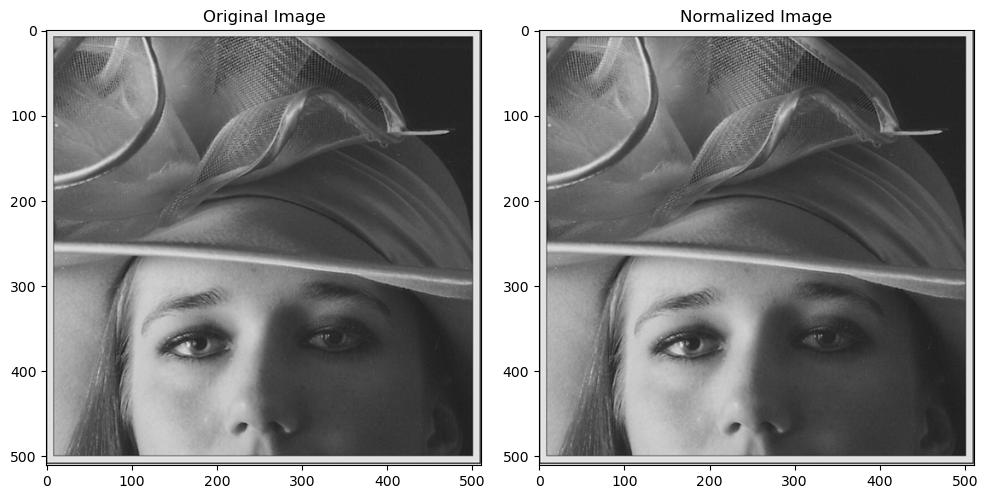

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('low_contrast.jpg', cv2.IMREAD_GRAYSCALE)

# Normalize the pixel values
normalized_image = image.astype(np.float32) / 255.0
normalized_image = np.clip(normalized_image, 0, 1)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image in the first subplot
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')

# Display the normalized image in the second subplot
axes[1].imshow(normalized_image, cmap='gray')
axes[1].set_title('Normalized Image')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

## question 2 c

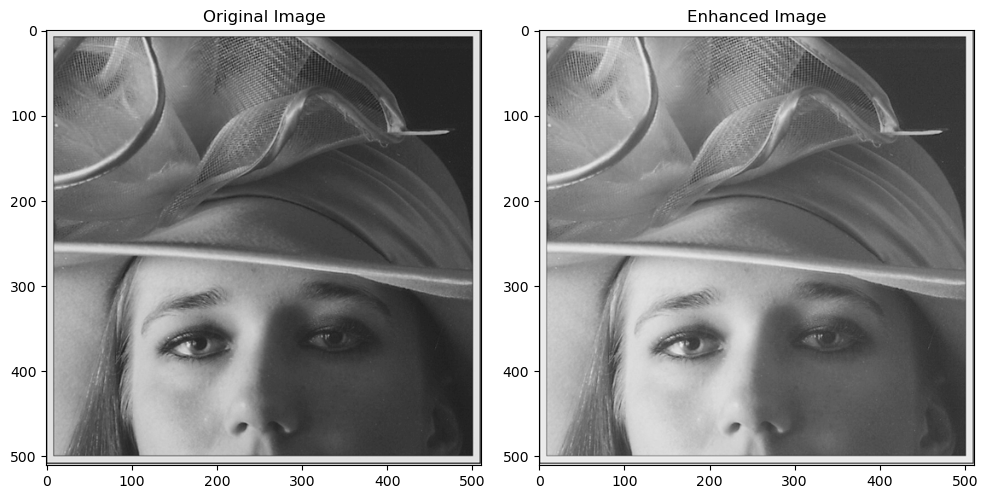

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('low_contrast.jpg', cv2.IMREAD_GRAYSCALE)

# Apply logarithmic contrast stretching
c = 1  # Choose an appropriate constant
enhanced_image = c * np.log1p(image)

# Scale the enhanced image to the range (0 to 1)
enhanced_image = enhanced_image / np.max(enhanced_image)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image in the first subplot
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')

# Display the enhanced image in the second subplot
axes[1].imshow(enhanced_image, cmap='gray')
axes[1].set_title('Enhanced Image')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

## question 2 d

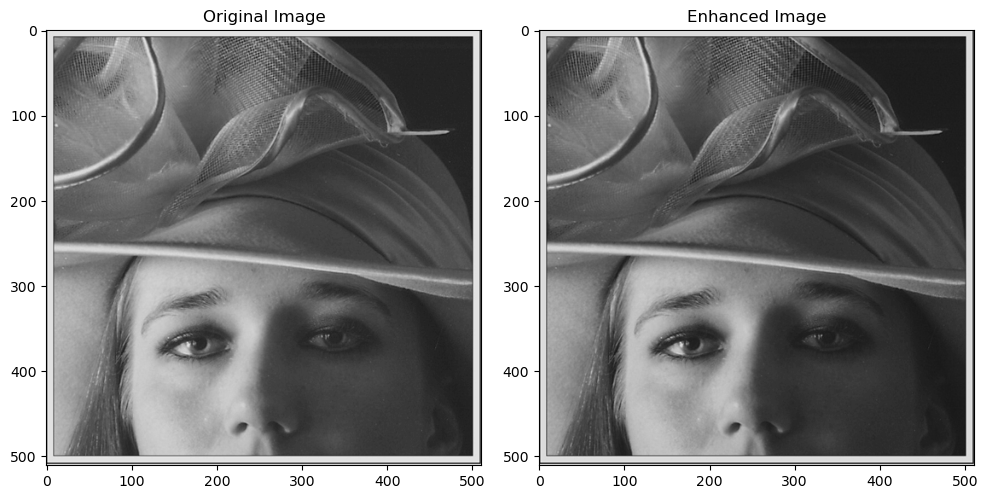

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('low_contrast.jpg', cv2.IMREAD_GRAYSCALE)

# Apply gamma correction
gamma = 1.5  # Choose a suitable gamma value
enhanced_image = np.power(image / 255.0, gamma)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image in the first subplot
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')

# Display the enhanced image in the second subplot
axes[1].imshow(enhanced_image, cmap='gray')
axes[1].set_title('Enhanced Image')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

## question 3 a

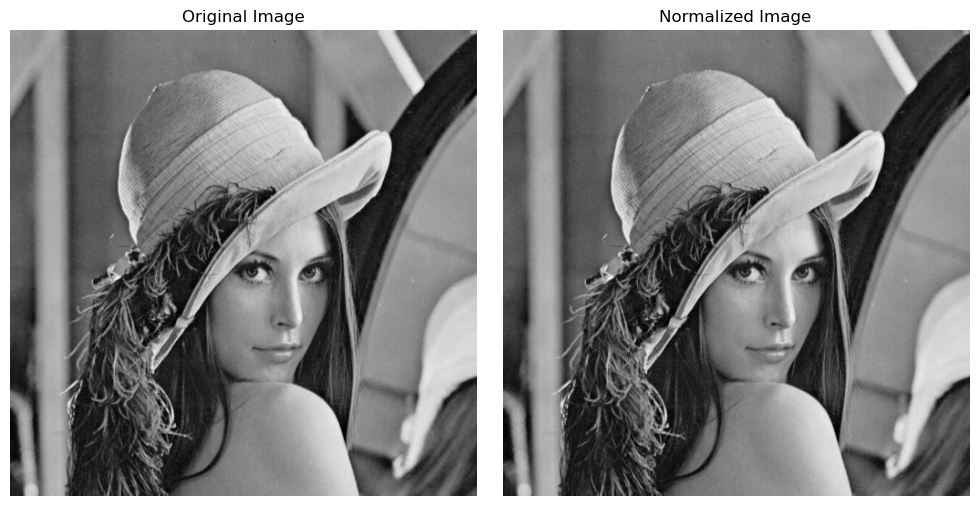

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Read the image using PIL
image = Image.open('lena_gray.gif')

# Convert the image to grayscale
image_gray = image.convert('L')

# Convert the images to NumPy arrays
image_array = np.array(image_gray)
normalized_image = image_array / 255.0

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image in the first subplot
axes[0].imshow(image_gray, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display the normalized image in the second subplot
axes[1].imshow(normalized_image, cmap='gray')
axes[1].set_title('Normalized Image')
axes[1].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

## question 3 b

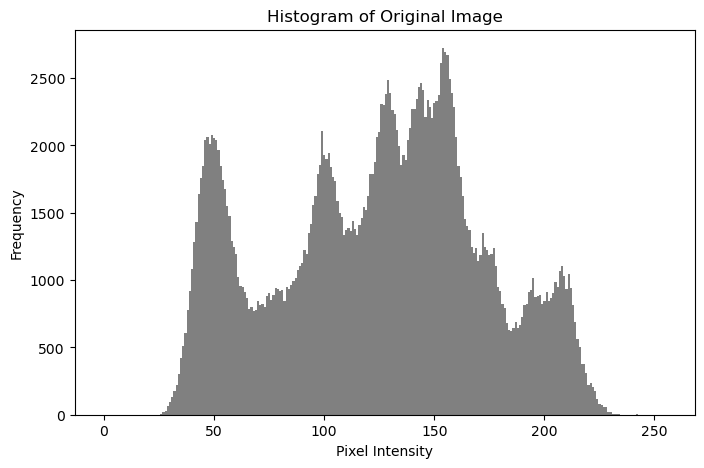

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Read the image using PIL
image = Image.open('lena_gray.gif')

# Convert the image to grayscale
image_gray = image.convert('L')

# Convert the image to a NumPy array
image_array = np.array(image_gray)

# Calculate the histogram
histogram, bins = np.histogram(image_array.flatten(), bins=256, range=[0, 256])

# Plot the histogram
plt.figure(figsize=(8, 5))
plt.bar(bins[:-1], histogram, width=1, color='gray')
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

## question 3 c

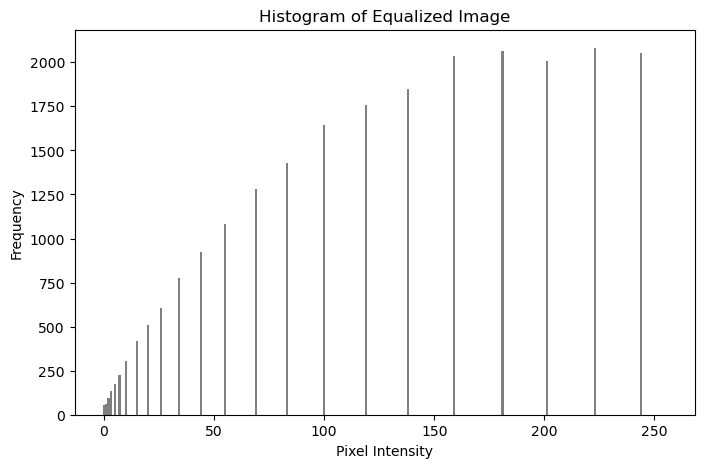

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Read the image using PIL
image = Image.open('lena_gray.gif')

# Convert the image to grayscale
image_gray = image.convert('L')

# Convert the image to a NumPy array
image_array = np.array(image_gray)

# Calculate the histogram of the original image
histogram, bins = np.histogram(image_array.flatten(), bins=256, range=[0, 256])

# Compute the cumulative distribution function (CDF) of the histogram
cdf = histogram.cumsum()

# Normalize the CDF
cdf_normalized = cdf * histogram.max() / cdf.max()

# Perform histogram equalization
equalized_image = np.interp(image_array.flatten(), bins[:-1], cdf_normalized).reshape(image_array.shape)

# Calculate the histogram of the equalized image
equalized_histogram, equalized_bins = np.histogram(equalized_image.flatten(), bins=256, range=[0, 256])

# Plot the histogram of the equalized image
plt.figure(figsize=(8, 5))
plt.bar(equalized_bins[:-1], equalized_histogram, width=1, color='gray')
plt.title('Histogram of Equalized Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

## quesstion 3 d

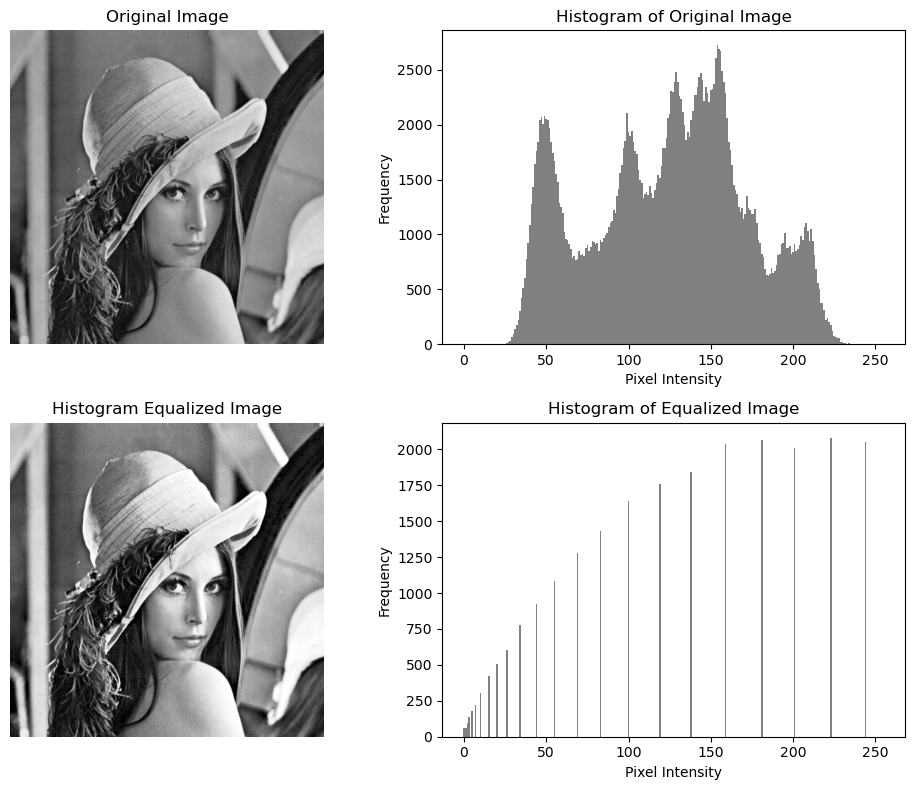

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Read the original image using PIL
image = Image.open('lena_gray.gif')

# Convert the image to grayscale
image_gray = image.convert('L')

# Convert the image to a NumPy array
image_array = np.array(image_gray)

# Calculate the histogram of the original image
histogram, bins = np.histogram(image_array.flatten(), bins=256, range=[0, 256])

# Compute the cumulative distribution function (CDF) of the histogram
cdf = histogram.cumsum()

# Normalize the CDF
cdf_normalized = cdf * histogram.max() / cdf.max()

# Perform histogram equalization
equalized_image = np.interp(image_array.flatten(), bins[:-1], cdf_normalized).reshape(image_array.shape)

# Calculate the histogram of the equalized image
equalized_histogram, equalized_bins = np.histogram(equalized_image.flatten(), bins=256, range=[0, 256])

# Plot the original image, equalized image, and their respective histograms side by side
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot the original image
axes[0, 0].imshow(image_gray, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Plot the histogram of the original image
axes[0, 1].bar(bins[:-1], histogram, width=1, color='gray')
axes[0, 1].set_title('Histogram of Original Image')
axes[0, 1].set_xlabel('Pixel Intensity')
axes[0, 1].set_ylabel('Frequency')

# Plot the equalized image
axes[1, 0].imshow(equalized_image, cmap='gray')
axes[1, 0].set_title('Histogram Equalized Image')
axes[1, 0].axis('off')

# Plot the histogram of the equalized image
axes[1, 1].bar(equalized_bins[:-1], equalized_histogram, width=1, color='gray')
axes[1, 1].set_title('Histogram of Equalized Image')
axes[1, 1].set_xlabel('Pixel Intensity')
axes[1, 1].set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the images and histograms
plt.show()

## question 4 a and b

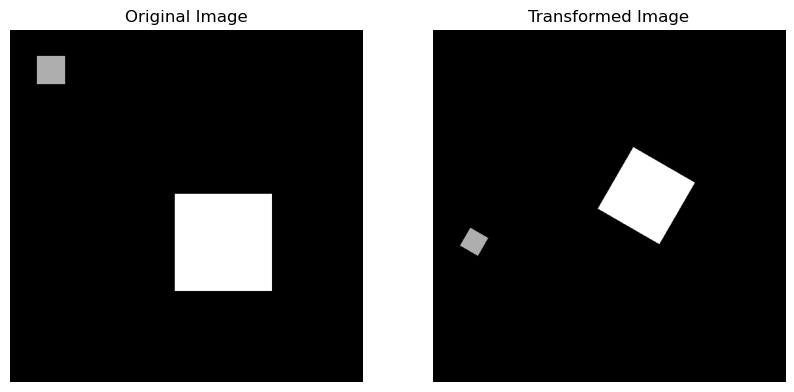

In [33]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = Image.open("square.gif")

# Convert the image to grayscale
image = image.convert("L")

# Convert the image to a NumPy array
image_array = np.array(image)

# Define translation parameters
translation_x = 40
translation_y = 40

# Define rotation angle in degrees
rotation_angle = 60

# Perform translation on the small square
small_square_translated = np.roll(image_array, shift=(translation_x, translation_y), axis=(1, 0))

# Perform rotation on the large square
large_square_rotated = Image.fromarray(image_array)
large_square_rotated = large_square_rotated.rotate(rotation_angle, expand=True)

# Convert the rotated image back to a NumPy array
large_square_rotated = np.array(large_square_rotated)

# Plot the original and transformed images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(image_array, cmap="gray")
axs[0].set_title("Original Image")
axs[0].axis("off")
axs[1].imshow(large_square_rotated, cmap="gray")
axs[1].set_title("Transformed Image")
axs[1].axis("off")
plt.show()